# Image blurring and matrix multiplication

We can think of the blurring due to a poorly focused lens as a local weighted average of pixel values. Let's think first about a one-dimensional "image" with some sharp features.

In [1]:
using LinearAlgebra, PyPlot

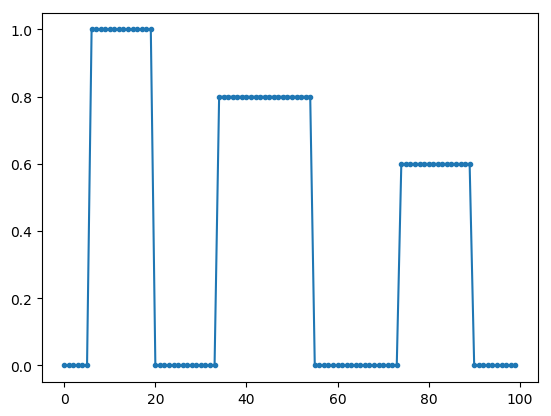

In [2]:
x = zeros(100); x[7:20] .= 1; x[35:55] .= .8;  x[75:90] .= 0.6;
plot(x,".-");

We represent blurring by a tridiagonal matrix. 

In [3]:
b0 = fill(.5,100);  b1 = fill(.25,99);
B = diagm(0=>b0,1=>b1,-1=>b1);
B[1:6,1:6]

6×6 Array{Float64,2}:
 0.5   0.25  0.0   0.0   0.0   0.0 
 0.25  0.5   0.25  0.0   0.0   0.0 
 0.0   0.25  0.5   0.25  0.0   0.0 
 0.0   0.0   0.25  0.5   0.25  0.0 
 0.0   0.0   0.0   0.25  0.5   0.25
 0.0   0.0   0.0   0.0   0.25  0.5 

An application of blurring softens the "edges". 

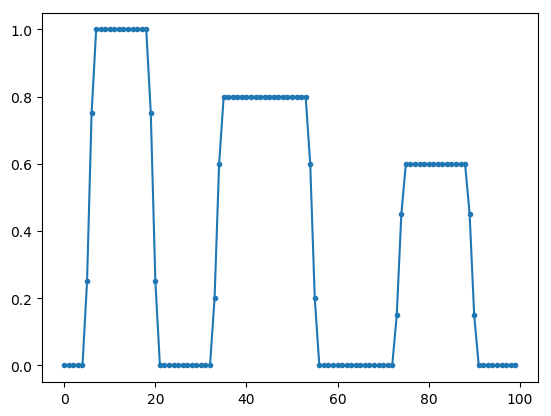

In [4]:
plot(B*x,".-");

More blurring produces more softening.

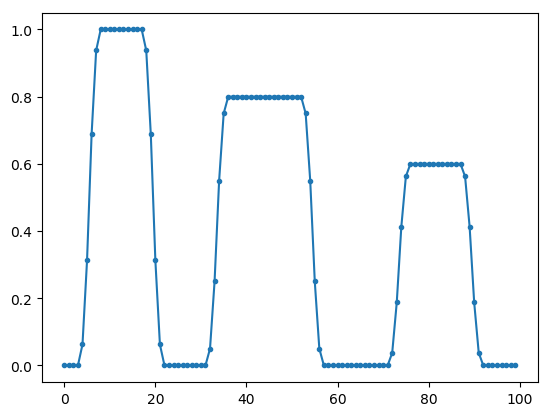

In [5]:
plot(B*(B*x),".-");

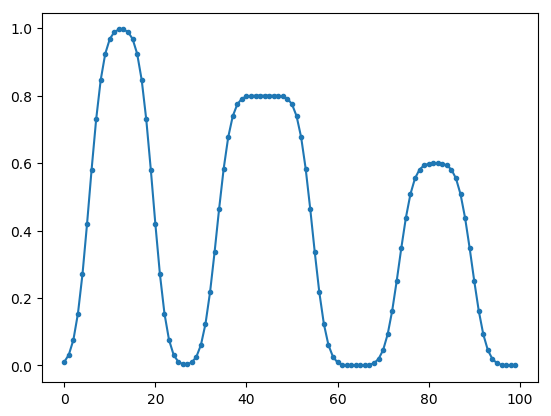

In [6]:
plot(B^12*x,".-");

Now we load in an image from a local file. 

size(H) = (400, 600, 3)

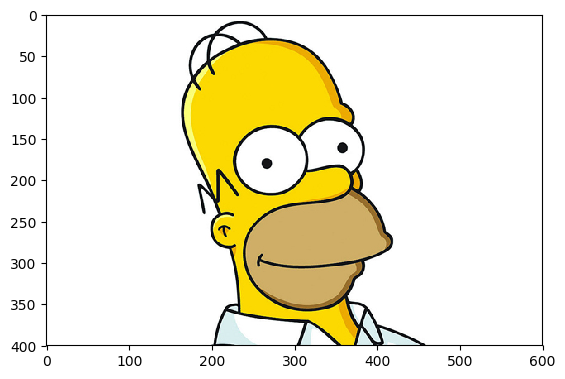

In [7]:
H = imread("homer.png");
@show size(H)
imshow(H);

This array has three dimensions in order to give an R,G,B triple for each pixel. We'll convert it to an ordinary matrix by using a simple grayscale conversion. 

In [8]:
X = .3H[:,:,1] + .59H[:,:,2] + .1H[:,:,3];
@show size(X)

size(X) = (400, 600)


(400, 600)

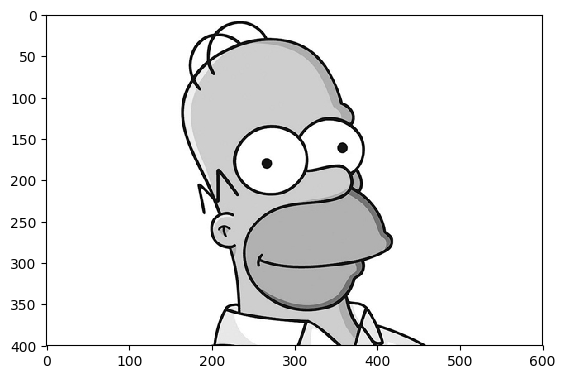

In [9]:
imshow(X,cmap="gray");

Each column of $X$ is a line of (mostly piecewise constant) data, representing a vertical line in the image. Because the product $BX$ is equivalent to multiplying each column of $X$ on the left by $B$, we can blur all of them in one go.

In [10]:
m,n = size(X);
b0 = fill(.5,m);  b1 = fill(.25,m-1);
B = diagm(0=>b0,1=>b1,-1=>b1);

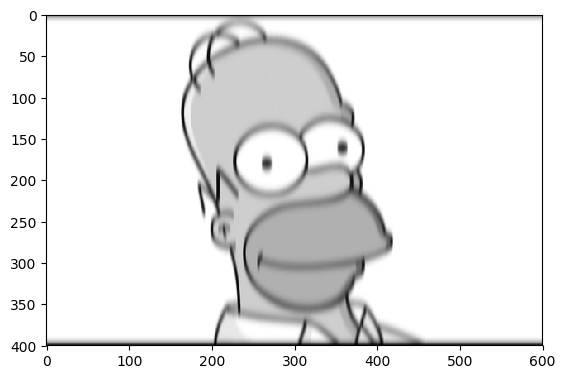

In [11]:
imshow(B^40*X,cmap="gray");

In the image above, horizontally oriented curves in the drawing are maximally blurred, while vertically oriented curves aren't blurred at all. In order to apply the blurring in the other direction, we can transpose $X$ in order to convert its rows to columns.

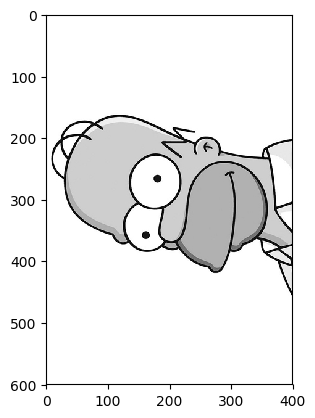

In [12]:
Xt = Array(X'); imshow(Xt,cmap="gray");

In [13]:
c0 = fill(.5,n);  c1 = fill(.25,n-1);
C = diagm(0=>c0,1=>c1,-1=>c1);

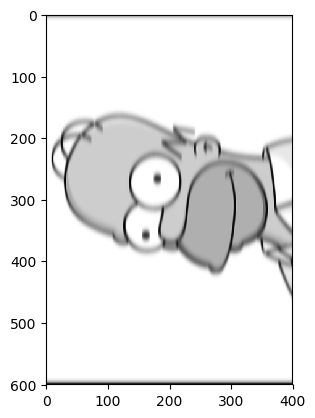

In [14]:
imshow(C^40*Xt,cmap="gray");

Of course, we want to restore the original orientation, which means transposing the result. But since $(CX^T)^T=(X^T)^TC^T=XC^T$, it's easy to express all of this using a right-multiplication. 

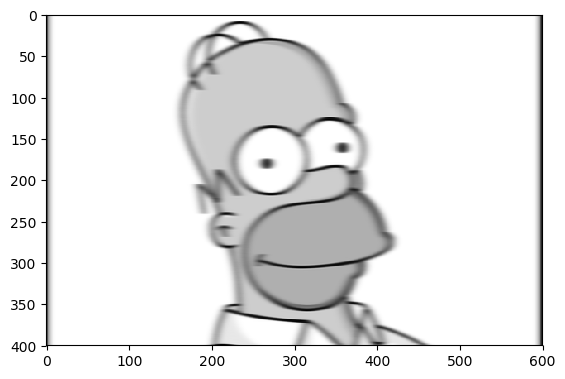

In [15]:
imshow(X*(C')^40,cmap="gray");

Finally, since matrix multiplication is associative, we can do the products on the left and right in a single expression.

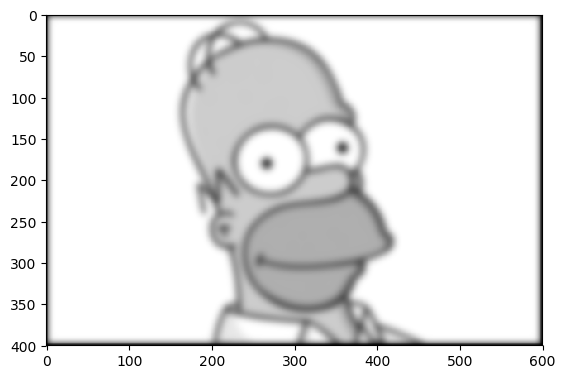

In [16]:
Y = B^40*X*(C')^40;
imshow(Y,cmap="gray");